<a href="https://colab.research.google.com/github/kwnstantinosRoumeliwtis/ML_COURSE/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Εργασία 1 – Επιβλεπόμενη Μάθηση**

# Όνομα: Κωνσταντίνος Ρουμελιώτης
# ΑΕΜ: 190
# ΠΜΣ: AI

## **Μέρος 1**

## **Import Libraries**

1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## **Load Dataset**

In [ ]:
df = pd.read_csv('/content/sample_data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Describe variables of Dataset**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## **Plot variables**

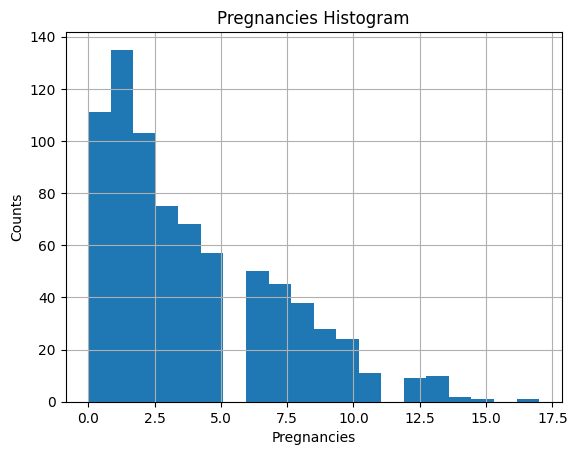

In [ ]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

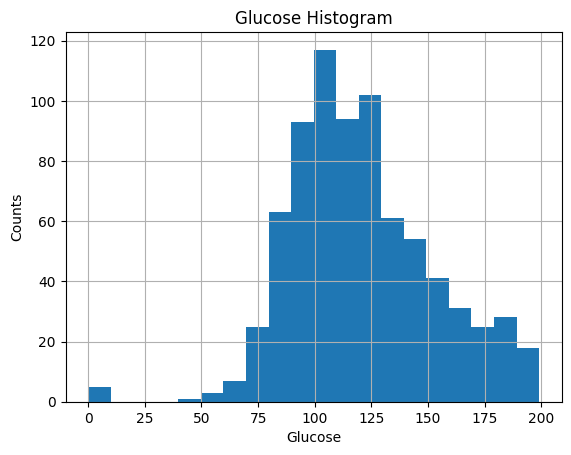

In [ ]:
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

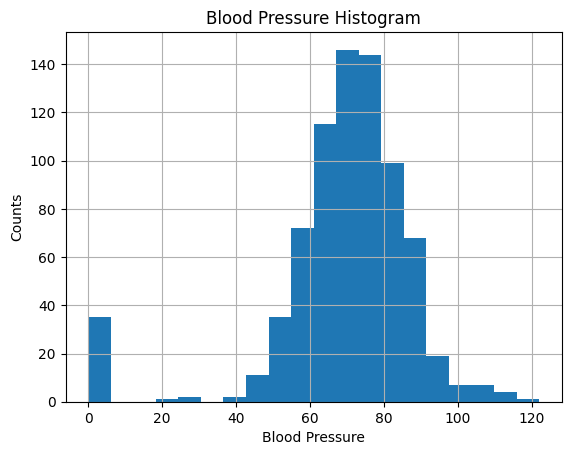

In [ ]:
df['BloodPressure'].hist(bins=20)
plt.title('Blood Pressure Histogram')
plt.xlabel('Blood Pressure')
plt.ylabel('Counts')
plt.show()

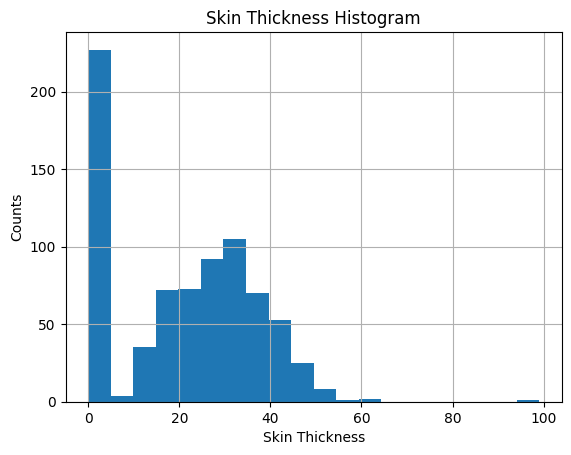

In [ ]:
df['SkinThickness'].hist(bins=20)
plt.title('Skin Thickness Histogram')
plt.xlabel('Skin Thickness')
plt.ylabel('Counts')
plt.show()


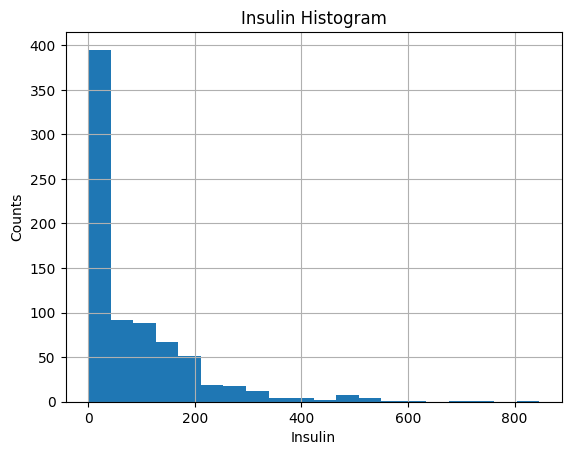

In [ ]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

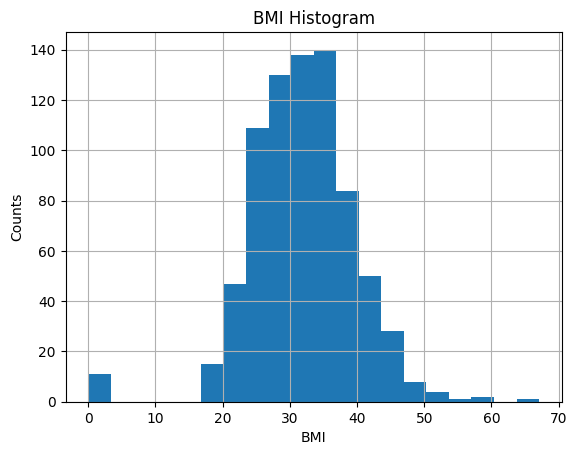

In [ ]:
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

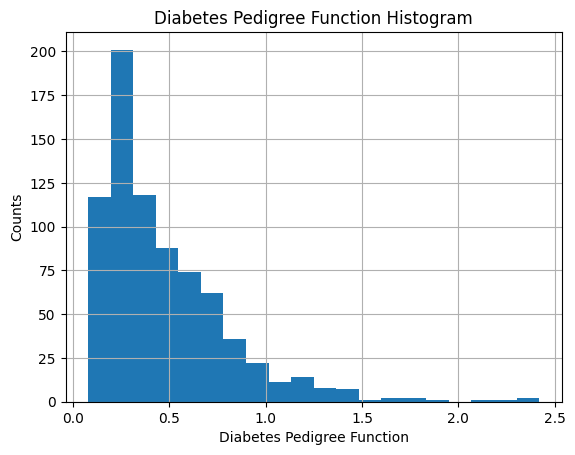

In [ ]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('Diabetes Pedigree Function Histogram')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Counts')
plt.show()

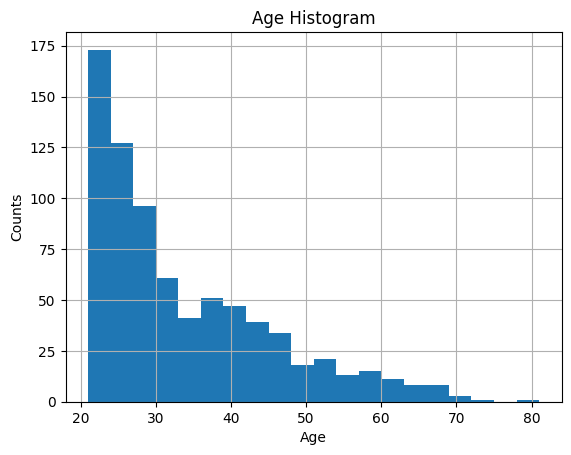

In [ ]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

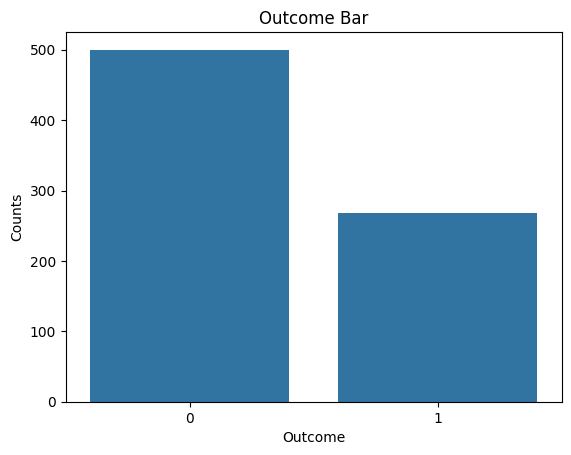

In [ ]:
category_counts = df['Outcome'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Outcome Bar')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.show()

2) Μπορούμε να πούμε ότι τα δεδομένα μας δεν είναι τέλεια. Γιατί υπάρχουν outliers, αλλά ωστόσο παίζει ρόλο τι αλγόριθμο θέλουμε να εφαρμόσουμε και η σημαντικότητα των μεταβλητών. Για την γραμμική παλινδρόμηση θα θέλαμε να έχουμε κανονικές κατανομές στις μεταβλητές. Στην πλειοψηφία τους τα ιστογράμματα μας δείχνουν κανονικές κατανομές και κατανομές με θετικές ασυμμετρίες. Επίσης δεν λείπουν δεδομένα στις στήλες (None). Επομένως το dataset είναι καλό. Αν γίνει preprocessing μπορεί να γίνει καλύτερο.

3) Η μεταβλητή Age έχει κατανομή με θετική ασυμμετρία, κατι το οποίο συχνά συναντάται σε χρονικά δεδομένα. Είναι λογικό στις μεγάλες ηλικίες να υπάρχουν λίγα δείγματα. Επομένως δεν είναι κάτι κακό στο συγκεκριμένο πρόβλημα. Αν το δείγμα μας ήταν για άλλη ασθένεια που συναντάται στις μεγαλύτερες ηλικίες κατά κύριο λόγο, όπως Parkinson θα ήταν σίγουρα προβληματικό, γιατί το μοντέλο μας θα είχε πολωθεί και αν το test dataset ήταν από μεγάλες ηλικίες θα προέβλεπε ότι αρκετοί που είναι ασθενείς δεν έχουν Parkinson.


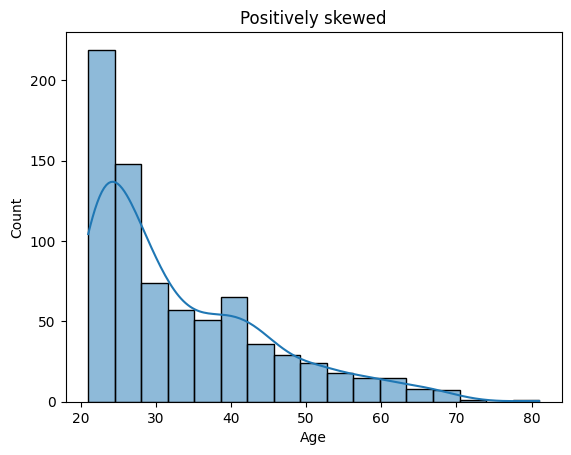

In [ ]:
sns.histplot(df["Age"], kde=True)
plt.title('Positively skewed')
plt.show()

4) Για να δείξουμε ότι κάποιος ασθενής που έχει υψηλή γλυκόζη είναι πιθανό να εμφανίσει διαβήτη πρέπει να συσχετίσουμε τα επίπεδα γλυκόζης με τα labels 0,1. Ένας καλός τρόπος να το κάνουμε είναι με boxplot όπου τονίζονται οι διαφορές, με τις ενδιάμεσες τιμές των μεταβλητών, καθώς επίσης φαίνεται η κατανομή των δεδομένων και οι outliers.


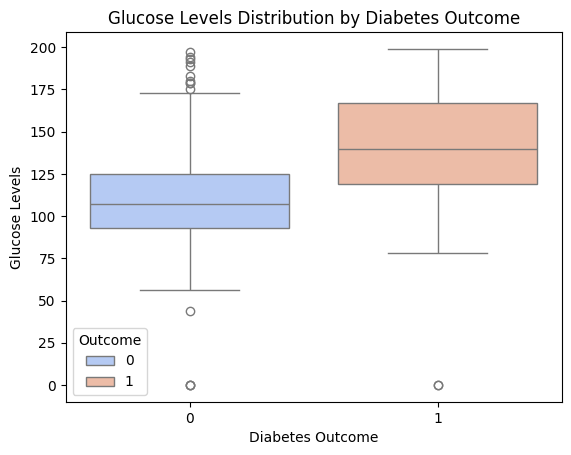

In [ ]:
df_selected = df[['Outcome', 'Glucose']]
sns.boxplot(x='Outcome', y='Glucose', data=df_selected, palette='coolwarm', hue = df_selected['Outcome'])
plt.xlabel('Diabetes Outcome')
plt.ylabel('Glucose Levels')
plt.title('Glucose Levels Distribution by Diabetes Outcome')

plt.show()

## **Convert DataFrame to Numpy arrays**

5)

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

## **Split Dataset to Train-Test**

In [ ]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

## **Create a Logistic Regression Model**

6)

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=seed)

## **Train the model**

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

## **Evaluate Model on test set**

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 77.92


## **Evaluate Model on Train set**

In [ ]:
yt_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, yt_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 76.54


Παρατηρούμε ότι έχουμε καλύτερη ακρίβεια στα δεδομένα του test, απ'οτι του train, άρα πετυχαίνουμε γενίκευση σε άγνωστα δεδομένα.

7)

Για να φτιάξουμε το barplot για τις συγκεκριμένες ηλικίες πρέπει να διαχωρίσουμε τα δεδομένα μας σε συγκεκριμένα εύρη τιμών με βάση την ηλικία.


The accuracy of the model for 1 category is: 83.78
The accuracy of the model for 2 category is: 72.79
The accuracy of the model for 3 category is: 90.48


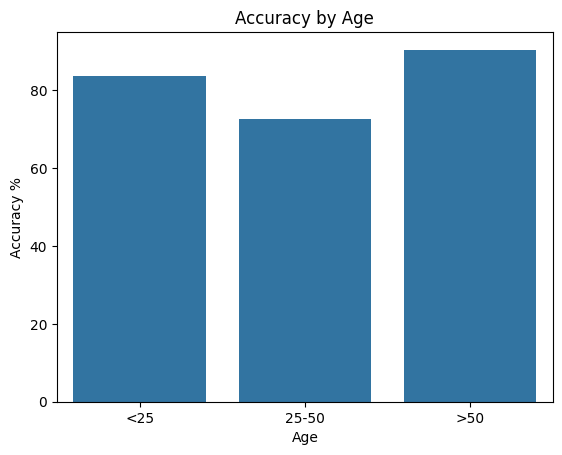

In [ ]:
x_25=[]
y_25=[]
x_50=[]
y_50=[]
x_above_50=[]
y_above_50=[]

for i in range(len(x_test)):
    if x_test[i][-1] < 25:
      x_25.append(x_test[i])
      y_25.append(y_test[i])
    elif x_test[i][-1] >= 25 and x_test[i][-1] <= 50:
      x_50.append(x_test[i])
      y_50.append(y_test[i])
    else:
      x_above_50.append(x_test[i])
      y_above_50.append(y_test[i])

y_pred_25 = model.predict(x_25)
y_pred_50 = model.predict(x_50)
y_pred_above_50 = model.predict(x_above_50)

predictions=[y_pred_25,y_pred_50,y_pred_above_50]
labels=[y_25,y_50,y_above_50]
accuracy_list=[]

for i in range(len(predictions)):
  accuracy = accuracy_score(labels[i], predictions[i])
  accuracy_percentage = round(accuracy*100, 2)
  accuracy_list.append(accuracy_percentage)
  print(f'The accuracy of the model for {i+1} category is: {accuracy_percentage}')

df_age=pd.DataFrame({'Age':['<25','25-50','>50'],'Accuracy':accuracy_list})
axis = sns.barplot(x='Age', y='Accuracy', data=df_age)
plt.xlabel('Age')
plt.ylabel('Accuracy %')
plt.title('Accuracy by Age')
plt.show()


Ο ταξινομητής δουλεύει καλά για τις ηλικίες άνω των 50, μέτρια για τις ηλικίες έως 25 ετών και όχι τόσο καλά για τις ηλικίες 25-50

8)

Θεωρώ χειρότερο ο ταξινομητής να προβλέψει ότι κάποιος δεν έχει διαβήτη ενώ έχει στην πραγματικότητα, διότι ίσως ο ασθενής επαναπαυθεί και δεν πάρει άμεσα τη θεραπεία που χρειάζεται. Στην αντίθετη περίπτωση αν προβλέψει ότι κάποιος έχει διαβήτη ενώ δεν έχει, πιθανότατα να προχωρήσει σε περισσότερες εξετάσεις και να επιβεβαιωθεί ότι δεν έχει και ότι ο ταξινομητής έκανε λάθος.

9)

In [ ]:
def calculate_mean_and_sd():
  seed=np.arange(10)
  test_size=0.3
  accuracy_test=[]
  accuracy_train=[]
  for i in range(0,10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed[i])
    model = LogisticRegression(max_iter=1000, random_state=seed[i])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    ytr_pred = model.predict(x_train)
    accuracy = accuracy_score(y_test, y_pred)
    accuracytr = accuracy_score(y_train, ytr_pred)
    accuracy_percentage = round(accuracy*100, 2)
    accuracy_percentagetr = round(accuracytr*100, 2)
    accuracy_test.append(accuracy_percentage)
    accuracy_train.append(accuracy_percentagetr)
    print(f'The accuracy of the model in test for seed {i} is: {accuracy_percentage} in test and is: {accuracy_percentagetr} in train')
  print(f'--------------------------------------------------------------------------------------------\nThe mean accuracy for the test data is: {np.mean(accuracy_test)}\nThe sd for the test data is: {np.std(accuracy_test)}\nThe mean accuracy for the train data is: {np.mean(accuracy_train)}\nThe sd for the train data is: {np.std(accuracy_train)}')

calculate_mean_and_sd()


The accuracy of the model in test for seed 0 is: 77.92 in test and is: 76.54 in train
The accuracy of the model in test for seed 1 is: 78.35 in test and is: 77.28 in train
The accuracy of the model in test for seed 2 is: 74.89 in test and is: 78.58 in train
The accuracy of the model in test for seed 3 is: 75.32 in test and is: 78.77 in train
The accuracy of the model in test for seed 4 is: 80.95 in test and is: 75.98 in train
The accuracy of the model in test for seed 5 is: 78.35 in test and is: 76.35 in train
The accuracy of the model in test for seed 6 is: 76.62 in test and is: 76.91 in train
The accuracy of the model in test for seed 7 is: 77.92 in test and is: 78.21 in train
The accuracy of the model in test for seed 8 is: 77.92 in test and is: 77.84 in train
The accuracy of the model in test for seed 9 is: 74.46 in test and is: 80.07 in train
--------------------------------------------------------------------------------------------
The mean accuracy for the test data is: 77.27
T

10)

In [ ]:
normal_df=df.drop(columns=["Outcome"])
normal_df=(normal_df-normal_df.min())/(normal_df.max()-normal_df.min())
normal_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


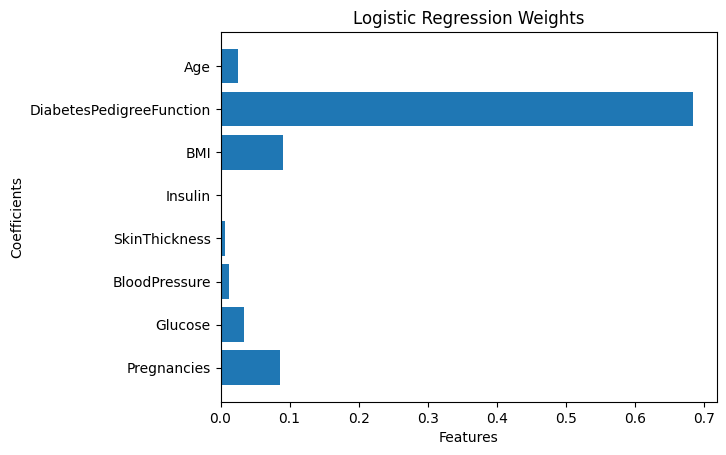

In [ ]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(normal_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Οι 3 βασικότεροι παράγοντες που επηρεάζουν την πρόβλεψη του διαβήτη είναι η κληρονομικότητα, το BMI, και οι εγκυμοσύνες. Αυτό φαίνεται από το παραπάνω barplot, διότι με βάση τα δεδομένα και τα targets αυτοί οι παράγοντες όσο πιο ισχυροί σε τιμές είναι επηρεάζουν το outcome, με πρώτη την προδιάθεση.

## **Mέρος 2**

1)

In [ ]:
dataset=df[["Pregnancies","BloodPressure", "BMI", "Age"]]
target=(df['Glucose'] > 170).astype(int)
x = dataset.to_numpy()
y = target.to_numpy()
x.shape, y.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape




((537, 4), (537,), (231, 4), (231,))

2)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [ ]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(f'The mean absolute error of the model is: {MAE}')
print(f'The mean squared error of the model is: {MSE}')

The mean absolute error of the model is: 0.15276416242314764
The mean squared error of the model is: 0.07836673730270934


Πιστεύω ότι η MAE είναι η καλύτερη μετρική σφάλματος γιατί η mean squared error μειώνει κατά πολύ το error στο prediction και δεν αντιπροσωπεύει το πραγματικό σφάλμα στα κανονικοποιημένα δεδομένα.

3)

In [ ]:
alpha=[0.2, 0.4, 0.6, 0.8, 1.0]
MAE_L=[]
MSE_L=[]
for i in range(len(alpha)):
  model=Lasso(alpha=alpha[i] )
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  MAE = mean_absolute_error(y_test, y_pred)
  MSE = mean_squared_error(y_test, y_pred)
  MAE_L.append(MAE)
  MSE_L.append(MSE)

Matrix = pd.DataFrame({
    'MSE': MSE_L,
    'MAE': MAE_L,
    'alpha': alpha
})
Matrix

,MSE,MAE,alpha
0,0.077849,0.155911,0.2
1,0.078825,0.161001,0.4
2,0.079106,0.162027,0.6
3,0.079106,0.162027,0.8
4,0.079106,0.162027,1.0


Σε αυτό το σημείο να πώ ότι αν χρησιμοποιούσα το normal_df που έχω κανονικοποιημένες τιμές, το alpha δεν επηρέαζε καθόλου τις μετρικές

4)

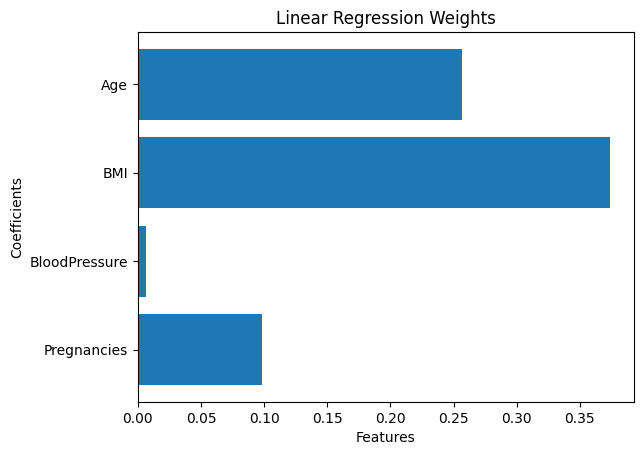

In [ ]:
no=normal_df[["Pregnancies","BloodPressure", "BMI", "Age"]]
target=(df['Glucose'] > 170).astype(int)
x = no.to_numpy()
y = target.to_numpy()
x.shape, y.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(no.columns, importance_weights)
plt.title('Linear Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

In [ ]:
dataset=df[["Pregnancies", "BMI", "Age"]]
target=(df['Glucose'] > 170).astype(int)
x = dataset.to_numpy()
y = target.to_numpy()
x.shape, y.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
print(f'The mean absolute error of the model is: {MAE}')
print(f'The mean squared error of the model is: {MSE}')

The mean absolute error of the model is: 0.15271349852757413
The mean squared error of the model is: 0.07833841441890575
